<a href="https://colab.research.google.com/github/somaksanyal97/Titanic-Survival-Prediction/blob/main/Survival_Prediction_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


# Dataset Load

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Github Projects/Survival Prediction - Titanic/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          759 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

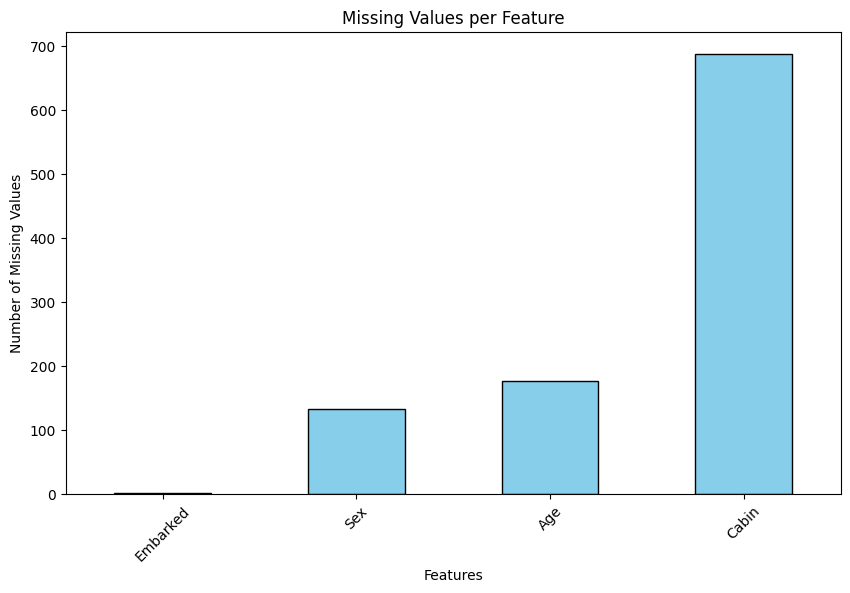

In [ ]:
missing_values = df.isna().sum()
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].sort_values().plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Feature')
plt.xticks(rotation=45)  # Rotate feature names for readability
plt.show()

In [ ]:
df = df.drop(columns = ['PassengerId','Cabin', 'Ticket'], axis=1)

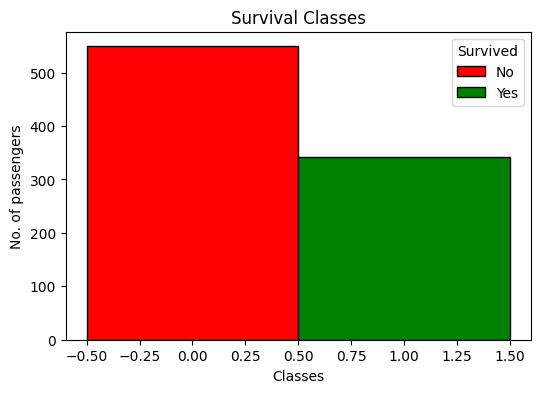

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df['Survived'][df['Survived'] == df['Survived'].unique()[0]], bins=1, color='red', edgecolor='black', label=str(df['Survived'].unique()[0]))
plt.hist(df['Survived'][df['Survived'] == df['Survived'].unique()[1]], bins=1, color='green', edgecolor='black', label=str(df['Survived'].unique()[1]))

plt.xlabel('Classes')
plt.ylabel('No. of passengers')
plt.title('Survival Classes')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

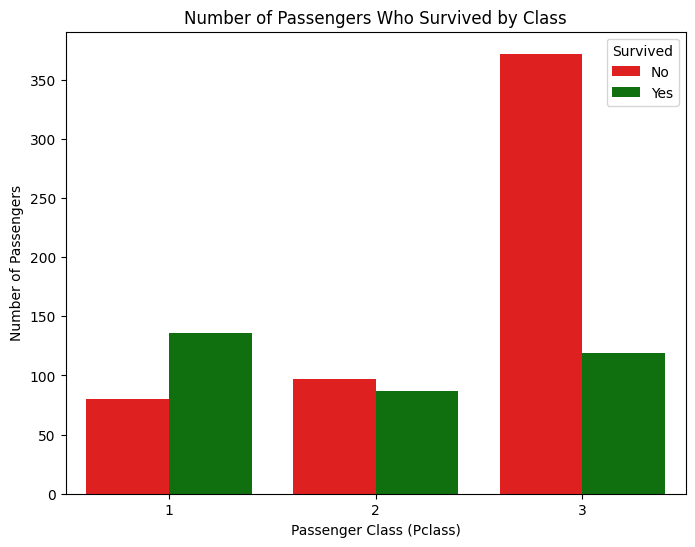

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette={0: 'red', 1: 'green'})

plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Who Survived by Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

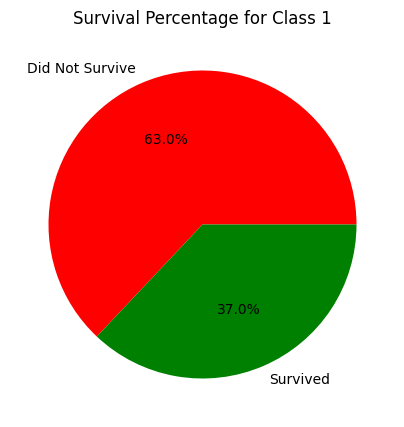

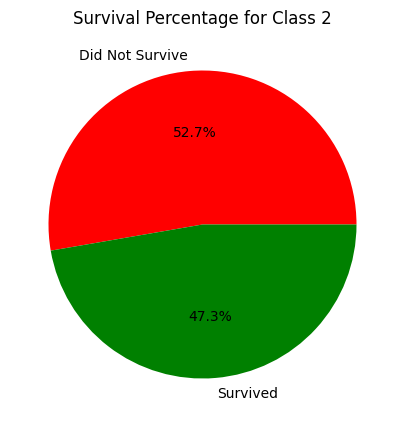

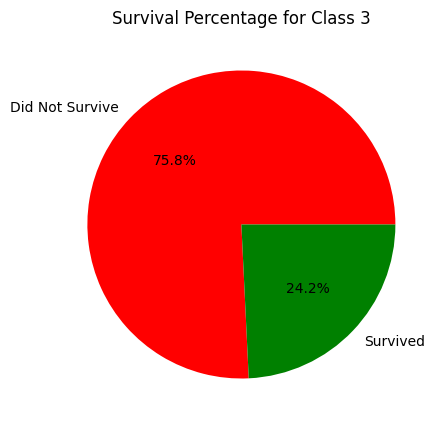

In [ ]:
for pclass in sorted(df['Pclass'].unique()):
    class_data = df[df['Pclass'] == pclass]['Survived'].value_counts(normalize=True) * 100

    plt.figure(figsize=(5, 5))
    plt.pie(class_data, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'])
    plt.title(f'Survival Percentage for Class {pclass}')
    plt.show()

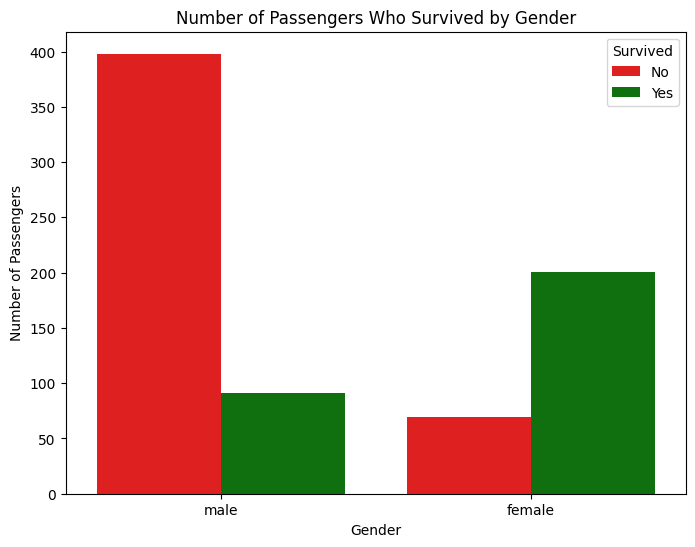

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette={0: 'red', 1: 'green'})

plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Who Survived by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

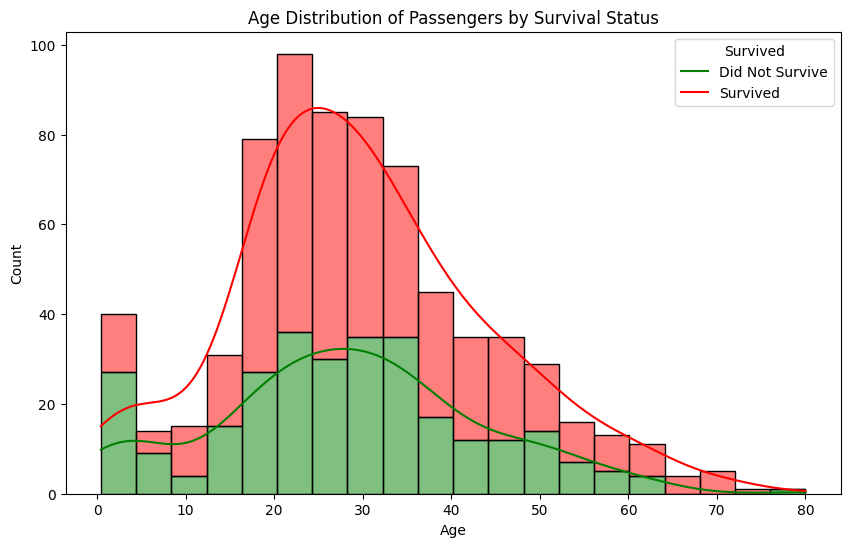

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette={0: 'red', 1: 'green'}, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers by Survival Status')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

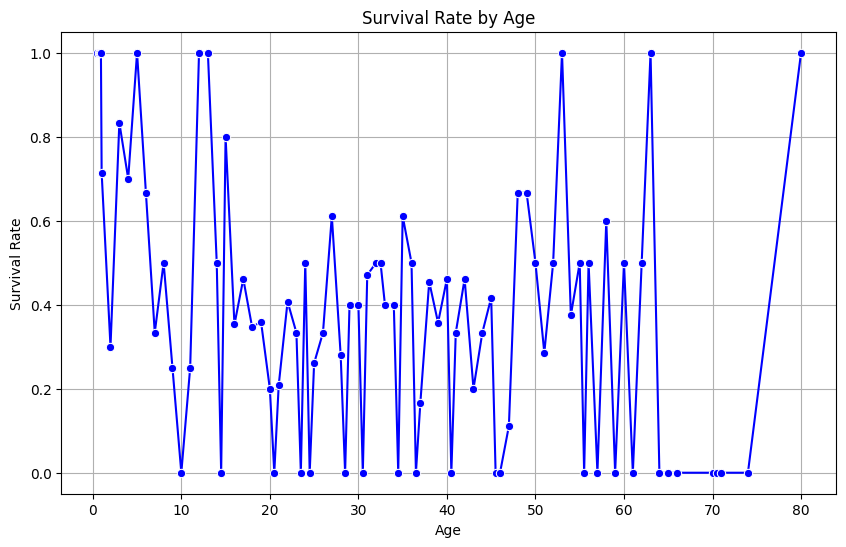

In [ ]:
survival_rate_by_age = df.groupby('Age')['Survived'].mean()

# Plot the survival chances (survival rate) for each unique age value
plt.figure(figsize=(10, 6))
sns.lineplot(x=survival_rate_by_age.index, y=survival_rate_by_age.values, marker='o', color='blue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age')
plt.grid(True)

# Show the plot
plt.show()

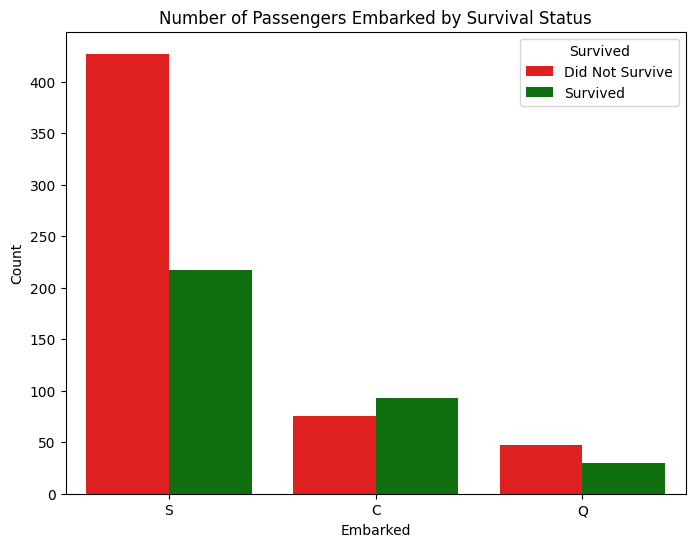

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Embarked', hue='Survived', palette={0: 'red', 1: 'green'})
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Number of Passengers Embarked by Survival Status')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

In [ ]:
df['Fare'].value_counts()


,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
35.0000,1
28.5000,1
6.2375,1


<ipython-input-129-cef1aefe3e6b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('Fare_bin')['Survived'].mean()


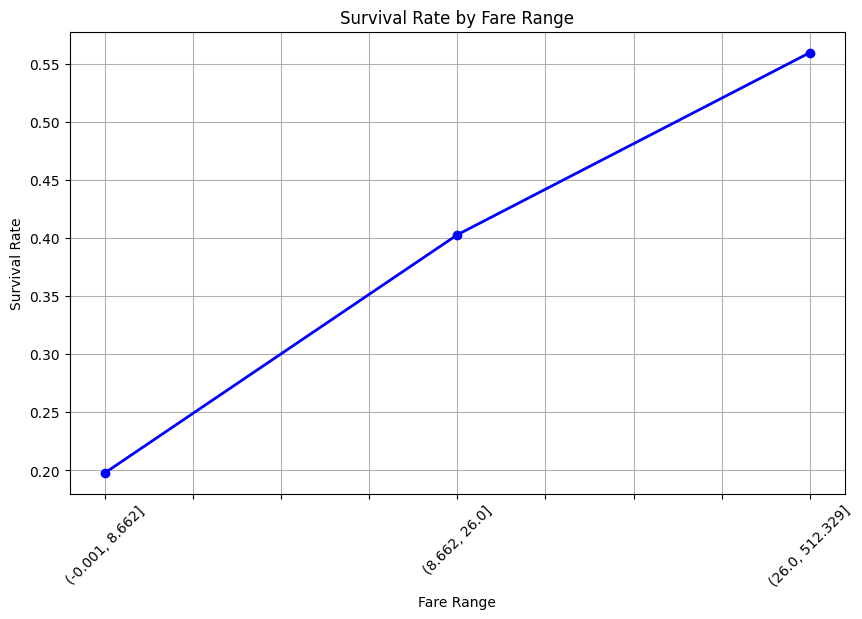

In [ ]:
df['Fare_bin'] = pd.qcut(df['Fare'], q=3)  # qcut to divide into quantiles
fare_survival = df.groupby('Fare_bin')['Survived'].mean()

plt.figure(figsize=(10, 6))
fare_survival.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Fare Range')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()

In [ ]:
df['SibSp'].value_counts()


,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


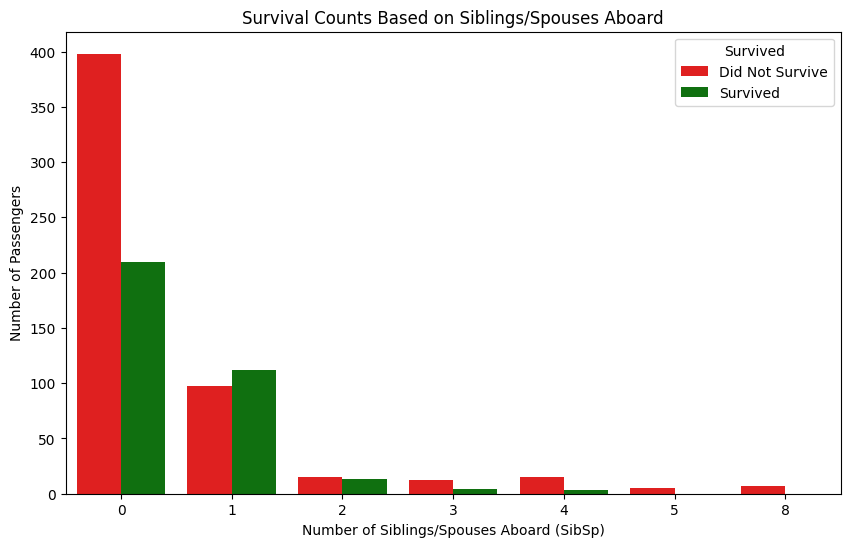

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SibSp', hue='Survived', palette={0: 'red', 1: 'green'})
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.ylabel('Number of Passengers')
plt.title('Survival Counts Based on Siblings/Spouses Aboard')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

In [ ]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


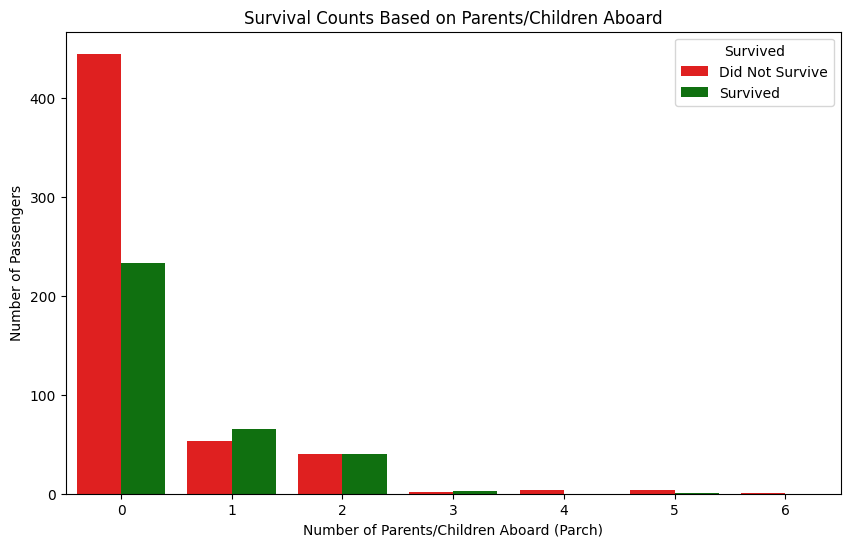

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Parch', hue='Survived', palette={0: 'red', 1: 'green'})

# Add labels and title
plt.xlabel('Number of Parents/Children Aboard (Parch)')
plt.ylabel('Number of Passengers')
plt.title('Survival Counts Based on Parents/Children Aboard')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

# Data Pre-processing

In [ ]:
X = df.drop(columns=['Survived','Fare_bin'], axis=1)
y = df['Survived']

In [ ]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
y.isna().sum()

0

In [ ]:
X.isna().sum()

,0
Pclass,0
Name,0
Sex,132
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
X['Embarked'].fillna(X['Embarked'].mode(), inplace=True)


<ipython-input-138-874a72426547>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Embarked'].fillna(X['Embarked'].mode(), inplace=True)


In [ ]:
# Define the list of substrings (titles) to search for in the 'Name' feature
titles = ['Mr', 'Mrs', 'Master', 'Miss', 'Rev', 'Capt', 'Dr', 'Col', 'Major', 'Mme', 'Ms', 'Don']

# Create a dictionary to store the mode of 'Sex' for each title
title_sex_modes = {}

# Calculate the mode of 'Sex' for rows where 'Name' contains each title
for title in titles:
    title_rows = X[X['Name'].str.contains(title, case=False, na=False)]
    title_sex_modes[title] = title_rows['Sex'].mode()[0] if not title_rows['Sex'].mode().empty else None

# Function to fill missing 'Sex' based on title in 'Name'
def fill_sex_based_on_title(row):
    if pd.isna(row['Sex']):  # Check if 'Sex' is missing
        for title, sex_mode in title_sex_modes.items():
            if title in row['Name']:  # Check if title is in the 'Name'
                return sex_mode  # Return the mode of 'Sex' for that title
    return row['Sex']  # If not missing, or no title found, return original 'Sex'

# Apply the function to fill missing 'Sex' values
X['Sex'] = X.apply(fill_sex_based_on_title, axis=1)

In [ ]:
 #Calculate median ages based on specific conditions in 'Name'
master_miss_median = X[X['Name'].str.contains('Master|Miss', case=False, na=False)]['Age'].median()
other_titles_median = X[X['Name'].str.contains('Mr|Mrs|Rev|Capt|Dr|Col|Major|Mme|Ms|Don', case=False, na=False)]['Age'].median()

# Print the median ages for verification
print(f"Median Age for 'Master' or 'Miss': {master_miss_median}")
print(f"Median Age for other titles ['Mr', 'Mrs', 'Rev', 'Capt', 'Dr', 'Col', 'Major', 'Mme', 'Ms', 'Don']: {other_titles_median}")

# Define a function to fill missing Age based on the title in 'Name'
def fill_age_based_on_title(row):
    if pd.isna(row['Age']):  # Check if Age is missing
        if 'Master' in row['Name'] or 'Miss' in row['Name']:
            return master_miss_median
        elif any(title in row['Name'] for title in ['Mr', 'Mrs', 'Rev', 'Capt', 'Dr', 'Col', 'Major', 'Mme', 'Ms', 'Don']):
            return other_titles_median
    return row['Age']  # Return original Age if not missing or no title found

# Apply the function to fill missing Age values
X['Age'] = X.apply(fill_age_based_on_title, axis=1)

# Display the first few rows to verify the changes
print(X[['Name', 'Age']].head(10))

Median Age for 'Master' or 'Miss': 18.0
Median Age for other titles ['Mr', 'Mrs', 'Rev', 'Capt', 'Dr', 'Col', 'Major', 'Mme', 'Ms', 'Don']: 31.0
                                                Name   Age
0                            Braund, Mr. Owen Harris  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                           Allen, Mr. William Henry  35.0
5                                   Moran, Mr. James  31.0
6                            McCarthy, Mr. Timothy J  54.0
7                     Palsson, Master. Gosta Leonard   2.0
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0
9                Nasser, Mrs. Nicholas (Adele Achem)  14.0


In [ ]:
X.isna().sum()

,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Sex' and store the mappings
X['Sex_encoded'] = label_encoder.fit_transform(X['Sex'])
sex_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Encode 'Embarked' and store the mappings
X['Embarked_encoded'] = label_encoder.fit_transform(X['Embarked'].astype(str))
embarked_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Create tables for the mappings
sex_mapping_df = pd.DataFrame(list(sex_mapping.items()), columns=['Original Sex', 'Encoded Sex'])
embarked_mapping_df = pd.DataFrame(list(embarked_mapping.items()), columns=['Original Embarked', 'Encoded Embarked'])

# Display the mapping tables
print("Sex Encoding Table:")
print(sex_mapping_df)

print("\nEmbarked Encoding Table:")
print(embarked_mapping_df)

Sex Encoding Table:
  Original Sex  Encoded Sex
0       female            0
1         male            1

Embarked Encoding Table:
  Original Embarked  Encoded Embarked
0                 C                 0
1                 Q                 1
2                 S                 2
3               nan                 3


In [ ]:
X = X.drop(columns=['Sex','Embarked','Name'], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2


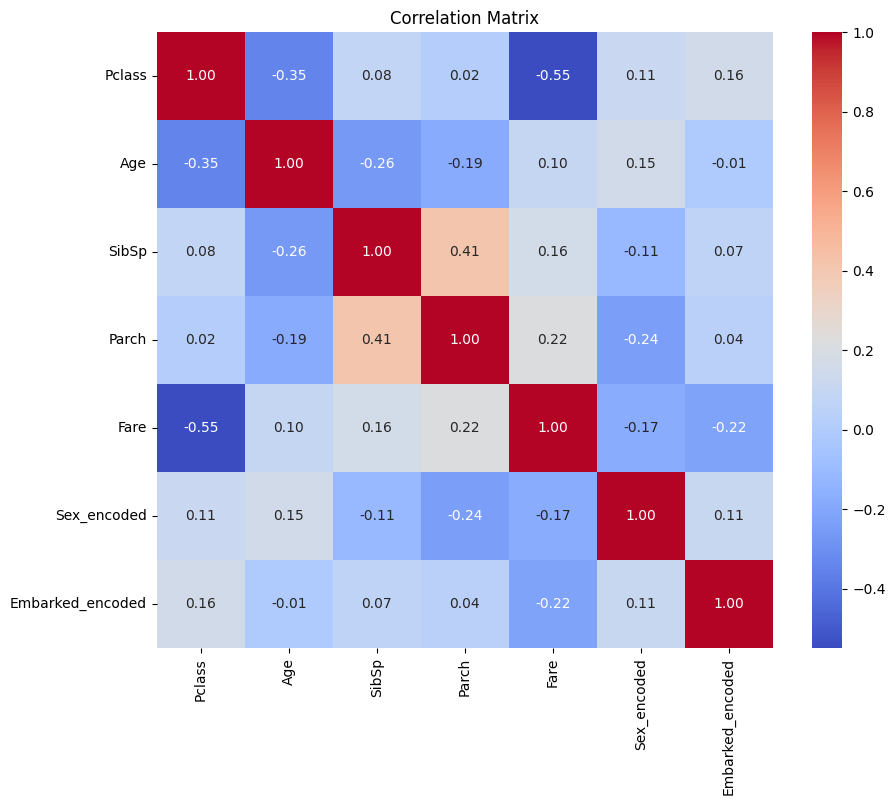

In [ ]:
corr_matrix = X.corr()

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()

<ipython-input-145-f965f35eafb6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_y.index, y=corr_with_y.values, palette='viridis')


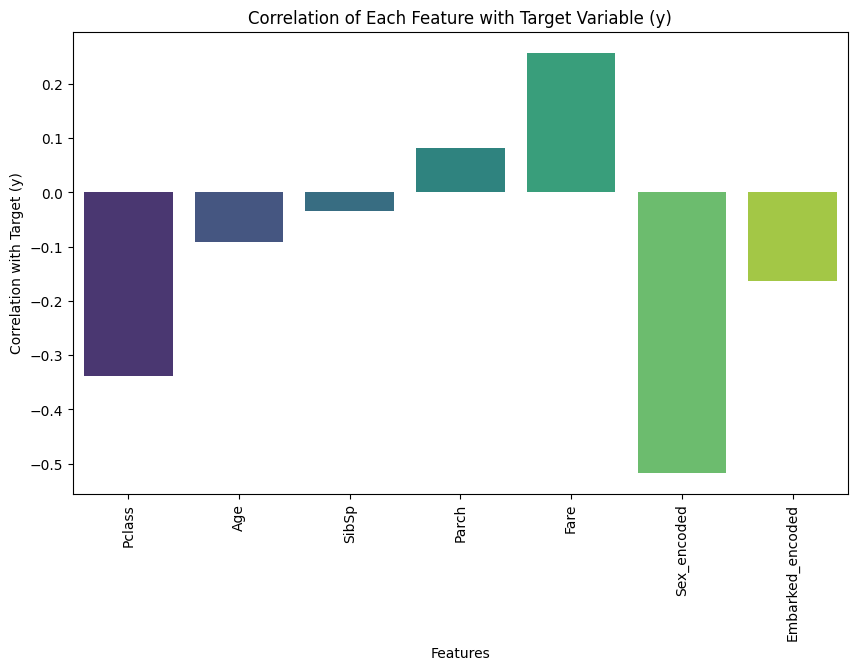

In [ ]:
corr_with_y = X.corrwith(y)

# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_y.index, y=corr_with_y.values, palette='viridis')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Correlation with Target (y)')
plt.title('Correlation of Each Feature with Target Variable (y)')

# Rotate feature names for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize and fit the scaler on the training data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Step 3: Transform the test set with the same scaler
X_test_normalized = scaler.transform(X_test)
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)

# Display the normalized data
print("Normalized Training Set:")
print(X_train_normalized.head())

print("\nNormalized Test Set:")
print(X_test_normalized.head())

Normalized Training Set:
     Pclass       Age     SibSp     Parch      Fare  Sex_encoded  \
0 -1.614136  1.229760 -0.470722 -0.479342 -0.078684     0.695222   
1 -0.400551 -0.474508 -0.470722 -0.479342 -0.377145     0.695222   
2  0.813034  0.207199 -0.470722 -0.479342 -0.474867     0.695222   
3  0.813034 -0.247272  0.379923 -0.479342 -0.476230     0.695222   
4  0.813034 -1.762177  2.931860  2.048742 -0.025249    -1.438390   

   Embarked_encoded  
0          0.557444  
1          0.557444  
2          0.557444  
3          0.557444  
4          0.557444  

Normalized Test Set:
     Pclass       Age     SibSp     Parch      Fare  Sex_encoded  \
0  0.813034 -0.853234  0.379923  0.784700 -0.333901     0.695222   
1 -0.400551  0.131454 -0.470722 -0.479342 -0.425284     0.695222   
2  0.813034 -0.701744 -0.470722 -0.479342 -0.474867     0.695222   
3 -0.400551 -1.762177 -0.470722  0.784700  0.007966    -1.438390   
4  0.813034 -1.156215  0.379923 -0.479342 -0.411002    -1.438390   

   

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_normalized, y_train)

# Step 5: Make predictions on the test set
y_pred = log_reg.predict(X_test_normalized)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 0.80
Precision: 0.78
Recall: 0.73

Confusion Matrix:
[[90 15]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normalized, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_model.predict(X_test_normalized)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Random Forest Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Model Evaluation Metrics:
Accuracy: 0.83
Precision: 0.81
Recall: 0.77

Confusion Matrix:
[[92 13]
 [17 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179

